In [1]:
%matplotlib inline

# Notes:

Plotting doesn't have to be this hard/ugly but the ultimate plot/s I was hoping to create are pretty complex. matplotlib gives you the flexibility to create these super complex plots so here we are

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuration data for better plot customization

(Note that this isn't as complex as it looks. I simply copy/paste this from notebook to notebook, rarely changing anything. Just like to have my customization options front and center.)

In [3]:
import matplotlib
###Default for jupyter display
matplotlib.rcParams['figure.dpi']= 150

matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['axes.titlesize'] = 10

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['legend.fontsize'] = 10
# matplotlib.rcParams['text.usetex'] = True

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Read in my pre-computed dataframes

These should have been created in `compute_structure_quality_metrics.ipynb`

In [4]:
df = pd.read_csv('../Results/QMEAN/full_results.tsv', sep='\t', index_col=0)
print(df.shape)
df.head()

(328, 6)


,protein,variant,template,model_number,source,qmeandisco_score
0,EFTU,1efc,NaN,model1,ITASSER,0.821203
1,EFTU,1efc,NaN,model2,ITASSER,0.812577
2,EFTU,Anc168,NaN,model1,ITASSER,0.807184
3,EFTU,Anc168,NaN,model2,ITASSER,0.787163
4,EFTU,Anc262,NaN,model1,ITASSER,0.818077


In [5]:
best_df = pd.read_csv('../Results/QMEAN/best_results.tsv', sep='\t', index_col=0)
print(best_df.shape)
best_df.head()

(54, 6)


,protein,variant,template,model_number,source,qmeandisco_score
34,EFTU,1efc,NaN,NaN,empirical,0.847527
0,EFTU,1efc,NaN,model1,ITASSER,0.821203
246,EFTU,1efc,NaN,model4,trRosetta,0.768104
35,EFTU,6gfu,NaN,NaN,empirical,0.845782
2,EFTU,Anc168,NaN,model1,ITASSER,0.807184


# First, compare different modeller templates

In [6]:
###IF2 plots
protein = 'IF2'
model_labels_1 = ['Anc520',
               'Anc536',
               'Anc550',
               'Anc558',
               'Anc622',
               'Anc670',
               'Anc702',
               'Anc719',
               'Anc743',
               'Anc750',
               'Anc754',
               'Anc788',
                'Anc789']
model_labels_2 = ['1zo1', '3jcjF']

all_model_labels = model_labels_1 + model_labels_2
x_vals = list(range(len(all_model_labels)))

1zo1
(65, 6)
3jcj
(65, 6)
3jcj_1efc
(65, 6)


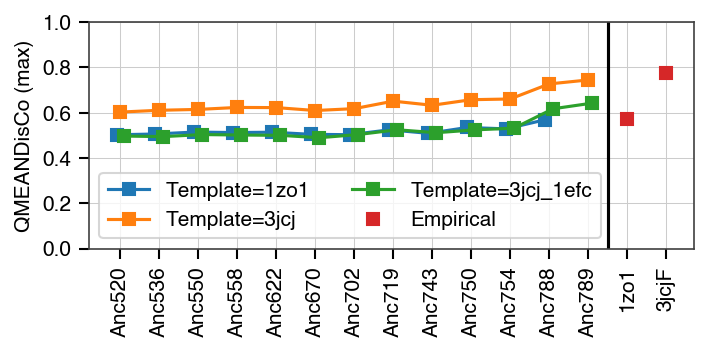

In [10]:
####Best plot
fig, ax = plt.subplots(figsize=(5.2,2))
x_offset=-0.1
method = 'modeller'
templates = ['1zo1', '3jcj', '3jcj_1efc']
for i, template in enumerate(templates):
    print(template)
    temp_df = df[(df['source']==method)&(df['protein']==protein)]
    temp_df = temp_df[temp_df['template']==template]
    print(temp_df.shape)
    y_vals_1 = []
    y_vals_2 = []
    for label in model_labels_1:
        proposed_df = temp_df[temp_df['variant']==label]
        proposed_df = proposed_df.sort_values('qmeandisco_score', ascending=False)
        if proposed_df.shape[0] >= 1:
            y_vals_1.append(proposed_df.iloc[0]['qmeandisco_score'])
        else:
            y_vals_1.append(np.nan)
            
    ###Plot the line/data for each template here!
    ax.plot(np.array(x_vals[:len(model_labels_1)])+x_offset,
            y_vals_1,
            label='Template={}'.format(template),
            color=colors[i],
            marker='s')
    x_offset += 0.1

###Now plot the empirical data that I want to add on to the end of the plots
temp_df = best_df[(best_df['source']=='empirical')&(best_df['protein']==protein)]
y_vals_2 = []
for label in model_labels_2:
    proposed_df = temp_df[temp_df['variant']==label]
    if proposed_df.shape[0] == 1:
        y_vals_2.append(proposed_df.iloc[0]['qmeandisco_score']) 
    else:
        y_vals_2.append(np.nan)
ax.plot(x_vals[len(model_labels_1):],
        y_vals_2,
        color=colors[i+1],
        linestyle='',
        marker='s',
        label='Empirical')

###Plot a line that will separate them
ax.axvline(len(x_vals)-len(model_labels_2)-0.5, c='k')


###Adjust some properties of the plot (labels, etc.)
ax.set_ylim(0, 1)
ax.set_xticks(x_vals)
ax.set_xticklabels(all_model_labels, rotation=90);
ax.set_ylabel('QMEANDisCo (max)')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2)

# Plotting only the best model for all programs that created multiple models

In [11]:
###IF2 plots
protein = 'IF2'
model_labels_1 = ['Anc520',
               'Anc536',
               'Anc550',
               'Anc558',
               'Anc622',
               'Anc670',
               'Anc702',
               'Anc719',
               'Anc743',
               'Anc750',
               'Anc754',
               'Anc788']
model_labels_2 = ['1zo1', '3jcjF']
model_labels_3 = ['1zo1', '3jcjF']


# ##EFTU plots
# protein = 'EFTU'
# model_labels_1 = ['Anc168',
#                'Anc262']
# model_labels_2 = ['1efc']
# model_labels_3 = ['1efc', '6gfu']


all_model_labels = model_labels_1 + model_labels_2 + model_labels_3
x_vals = list(range(len(all_model_labels)))

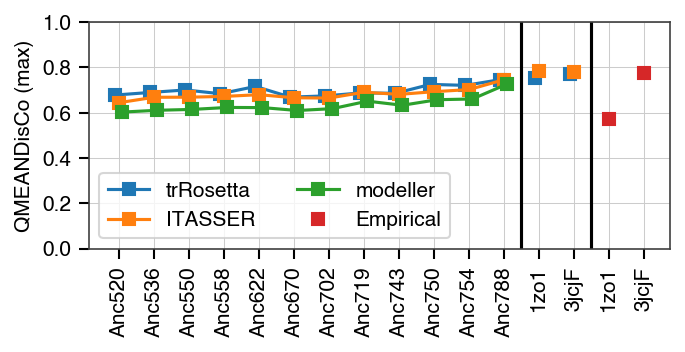

In [12]:
####Best plot
fig, ax = plt.subplots(figsize=(5,2))
x_offset=-0.1
methods = ['trRosetta', 'ITASSER', 'modeller']
for i, method in enumerate(methods):
    temp_df = best_df[(best_df['source']==method)&(best_df['protein']==protein)]
    y_vals_1 = []
    y_vals_2 = []
    for label in model_labels_1:
        proposed_df = temp_df[temp_df['variant']==label]
        if proposed_df.shape[0] == 1:
            y_vals_1.append(proposed_df.iloc[0]['qmeandisco_score'])
        else:
            y_vals_1.append(np.nan)
    for label in model_labels_2:
        proposed_df = temp_df[temp_df['variant']==label]
        if proposed_df.shape[0] == 1:
            y_vals_2.append(proposed_df.iloc[0]['qmeandisco_score']) 
        else:
            y_vals_2.append(np.nan)
    
    ax.plot(np.array(x_vals[:len(model_labels_1)])+x_offset,
            y_vals_1,
            label=method,
            color=colors[i],
            marker='s')
    
    ax.plot(np.array(x_vals[len(model_labels_1):len(model_labels_1)+len(model_labels_2)])+x_offset,
            y_vals_2,
            color=colors[i],
            linestyle='',
            marker='s')
    x_offset += 0.1


temp_df = best_df[(best_df['source']=='empirical')&(best_df['protein']==protein)]
y_vals_3 = []
for label in model_labels_3:
    proposed_df = temp_df[temp_df['variant']==label]
    if proposed_df.shape[0] == 1:
        y_vals_3.append(proposed_df.iloc[0]['qmeandisco_score']) 
    else:
        y_vals_3.append(np.nan)
ax.plot(x_vals[len(model_labels_1)+len(model_labels_2):],
        y_vals_3,
        color=colors[i+1],
        linestyle='',
        marker='s',
        label='Empirical')
    
ax.set_ylim(0, 1)
ax.axvline(len(x_vals)-len(model_labels_3)-0.5, c='k')
ax.axvline(len(x_vals)-len(model_labels_2)-len(model_labels_3)-0.5, c='k')
ax.set_xticks(x_vals)
ax.set_xticklabels(all_model_labels, rotation=90);
ax.set_ylabel('QMEANDisCo (max)')
# ax.legend(ncol=2, loc='best')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2)

# Instead of plotting the best score, plots means +/- standard deviations (if possible, for programs that provided multiple models)

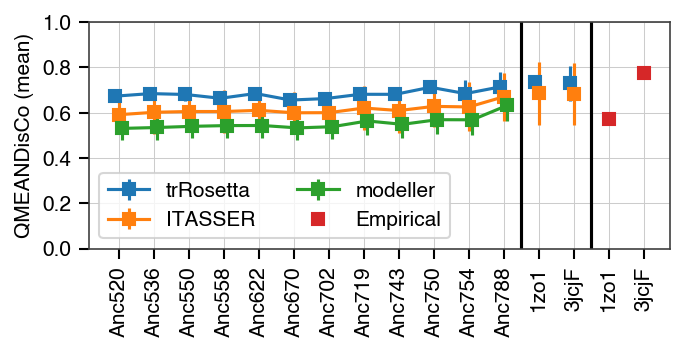

In [15]:
####Best plot
fig, ax = plt.subplots(figsize=(5,2))

methods = ['trRosetta', 'ITASSER', 'modeller']
x_offset=-0.1
for i, method in enumerate(methods):
    temp_df = df[(df['source']==method)&(df['protein']==protein)]
    y_vals_1 = []
    y_errs_1 = []
    y_vals_2 = []
    y_errs_2 = []
    for label in model_labels_1:
        proposed_df = temp_df[temp_df['variant']==label]
        if proposed_df.shape[0] > 0:
            y_vals_1.append(proposed_df['qmeandisco_score'].mean())
            y_errs_1.append(proposed_df['qmeandisco_score'].std())
        else:
            y_vals_1.append(np.nan)
            y_errs_1.append(np.nan)
    for label in model_labels_2:
        proposed_df = temp_df[temp_df['variant']==label]
        if proposed_df.shape[0] > 0:
            y_vals_2.append(proposed_df['qmeandisco_score'].mean())
            y_errs_2.append(proposed_df['qmeandisco_score'].std())
        else:
            y_vals_2.append(np.nan)
            y_errs_2.append(np.nan)
    
    ax.errorbar(np.array(x_vals[:len(model_labels_1)])+x_offset,
            y_vals_1,
            yerr=y_errs_1,
            label=method,
            color=colors[i],
            marker='s')
    ax.errorbar(np.array(x_vals[len(model_labels_1):len(model_labels_1)+len(model_labels_2)])+x_offset,
            y_vals_2,
            yerr=y_errs_2,
            color=colors[i],
            linestyle='',
            marker='s')
    x_offset += 0.1
temp_df = best_df[(best_df['source']=='empirical')&(best_df['protein']==protein)]
y_vals_3 = []
for label in model_labels_3:
    proposed_df = temp_df[temp_df['variant']==label]
    if proposed_df.shape[0] == 1:
        y_vals_3.append(proposed_df.iloc[0]['qmeandisco_score']) 
    else:
        y_vals_3.append(np.nan)
ax.plot(x_vals[len(model_labels_1)+len(model_labels_2):],
        y_vals_3,
        color=colors[i+1],
        linestyle='',
        marker='s',
        label='Empirical')
    
ax.set_ylim(0, 1)
ax.axvline(len(x_vals)-len(model_labels_3)-0.5, c='k')
ax.axvline(len(x_vals)-len(model_labels_2)-len(model_labels_3)-0.5, c='k')
ax.set_xticks(x_vals)
ax.set_xticklabels(all_model_labels, rotation=90);
ax.set_ylabel('QMEANDisCo (mean)')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 2, 3, 0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2)